## Question #1 


In [40]:
def dT_dt(T):
    return T**3 -581*T**2 -8870*T -29800
def d2T_dt2(T):
    return 3*T**2 - 1162*T - 17700

T0 =1000

At steady state the Time dependence of the system is null.
- $\frac{dT}{dt} = 0$
- Hence we must solve a Cubic equation to calculate $T^{ss}$
- t=0 => $T_0=298K$

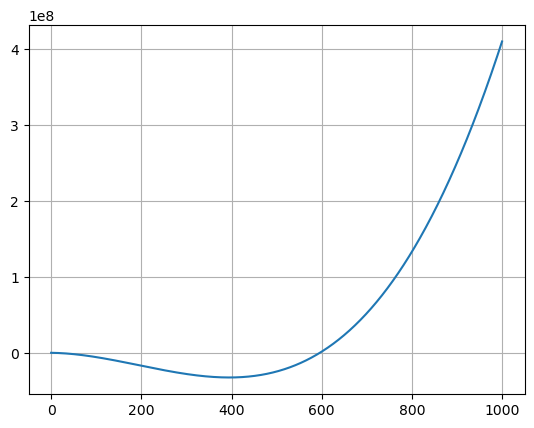

In [41]:
## Visulization
import numpy as np
import matplotlib.pyplot as plt
T = np.linspace(0, 1000, 1000)

plt.plot(T, dT_dt(T))
plt.grid(True)
plt.show()



In [42]:
## Solve the Cubic Equation
def newton(f, fder, x0, eps):
    x = x0
    while abs(f(x)) > eps:
        x = x - f(x)/fder(x)
    return x

def bisection(f, a, b, eps):
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
            "bisection method fails. f(a) and f(b) must have different signs."
        )
    fa = f(a)

    for i in range(100):
        c = (a + b)/2
        fc = f(c)
        if np.abs(fc) < eps:
            return c
        if np.sign(fc) == np.sign(fa):
            a = c
            fa = fc
        else:
            b = c

    return c

Tss = bisection(dT_dt, 0, 1000, 1e-6)
Tss

595.9672695167128

## Question #2 

- Solving $Mx=Y$ using LU decomposition

In [43]:
M = np.array(
 [ [1,4,2,3],
   [0,1,4,4],
   [-1,0,1,0],
   [2,0,4,1]  
 ] , dtype=float    
)
rho = 0.8
P0 = 1 
dL = 1 
Y = np.array([1,2,3,4],dtype=float).reshape((4,1))

def lu_decomposition_with_pivoting(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    P = np.eye(n)  
    
    for i in range(n):

        max_index = np.argmax(np.abs(U[i:, i])) + i
        if i != max_index:
            # Swap rows in U
            U[[i, max_index], :] = U[[max_index, i], :]

            if i > 0:
                L[[i, max_index], :i] = L[[max_index, i], :i]

            P[[i, max_index], :] = P[[max_index, i], :]
        
        # LU Decomposition as usual
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, :] -= L[j, i] * U[i, :]
    
    return P, L, U

def solve_with_pivoting(A, b):
    P, L, U = lu_decomposition_with_pivoting(A)
    n = A.shape[0]
    
    Pb = np.dot(P, b)
    
    y = np.zeros(n)
    for i in range(n):
        y[i] = (Pb[i] - np.dot(L[i, :i], y[:i]).item()) / L[i, i]  
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:]).item()) / U[i, i]  
    
    return x


x = solve_with_pivoting(M, Y)
print(f"Solution of the system Mx = Y : {x}")


Solution of the system Mx = Y : [-1.06153846  0.76923077  1.93846154 -1.63076923]


/var/folders/l9/6h3jgt952zj83sn29s4vbqvr0000gn/T/ipykernel_88413/3664965087.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = (Pb[i] - np.dot(L[i, :i], y[:i]).item()) / L[i, i]


In [44]:
def dP_dL(rho :float ,x : np.array) -> float:
    return x[0]*rho + x[1]*rho**2 + x[2]*rho**-2 + x[3]*rho**-1
P = P0 - dP_dL(rho, x)*dL
print(f"P is : {P0 - dP_dL(rho, x)*dL}" )
    

P is : 0.3665384615384619


## QUESTION #3


In [45]:
dl = np.array([0.1,0.2,0.3,0.6,0.9,1])
a = np.array([4,1,4,0.5,1,3])

def Integral_Trapezoidal(a, dl):
    sum = 0 
    for i in range(1,len(a)):
        sum += (a[i] + a[i-1])*0.5 * (dl[i] -dl[i-1])
    return sum

epsilon = Integral_Trapezoidal(a, dl)
print(f"The value of epsilon is : {Integral_Trapezoidal(a, dl):2f}")
    



The value of epsilon is : 1.600000


## QUESTION #4

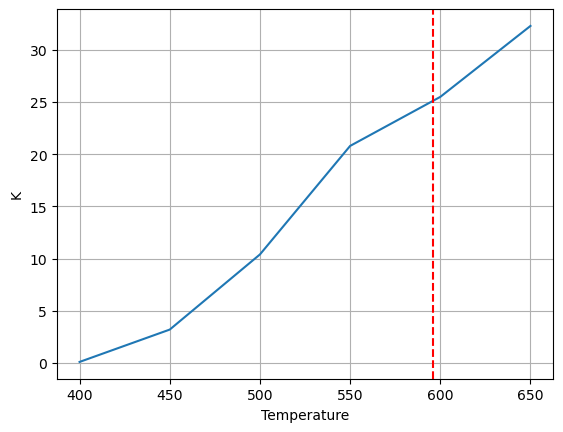

In [46]:
T = np.array([400,450,500,550,600,650])
K = np.array([0.1,3.2,10.4,20.8,25.5,32.3])

plt.plot(T, K)
plt.grid(True)
# Plotting Line x = Tss on the graph
plt.axvline(x=Tss, color='r', linestyle='--')
plt.xlabel("Temperature")
plt.ylabel("K")

plt.show()

We notice that the Line x = Tss Passes through our data points we can Linearise the interval bin to predict K(Tss)

In [47]:
def Linear(T):
    slope = (25.5 - 20.8 )/ (600 - 550)
    return slope * (T - 550) + 20.8


k_Tss = Linear(Tss) 
print("The value of K at Tss is : ", Linear(Tss)) 


The value of K at Tss is :  25.120923334571003


## Question #5

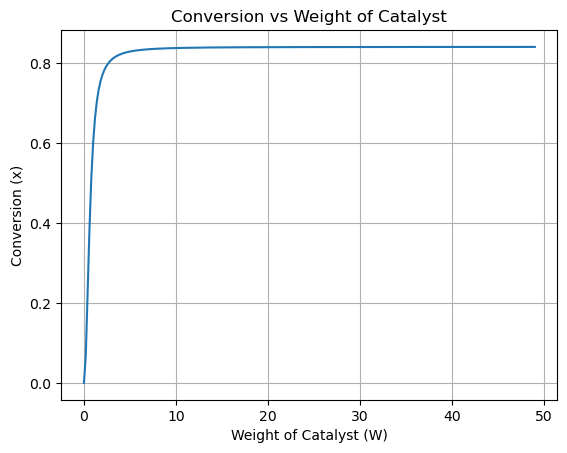

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (Provide appropriate values for constants)
k = k_Tss     # Reaction rate constant
C_A0 = 0.5     # Initial concentration of A in mol/m^3
epsilon = epsilon  # Porosity factor (provide value)
P = P        # Reactor outlet pressure (atm)
P0 = 1         # Inlet pressure (atm)
T0 = 298       # Initial temperature (K)
T = Tss        # Steady state temperature (provide value)
F_A0 = 1       # Molar flow rate of A (mol/s)

# Differential equation dx/dW
def dx_dW(W, x, k, C_A0, epsilon, P, P0, T0, T):
    return (W / (1 + W**2)**2) * (k * C_A0 * epsilon * (1 - x) * (P / P0) * (T0 / T))

# RK4 method for solving the ODE
def rk4_manual(f, x0, W0, W_max, step_size, tol = 1e-06):
    # Calculate the number of steps needed
    num_steps = int((W_max - W0) / step_size) + 1
    
    # Initialize W and x arrays manually
    W_values = [0] * num_steps
    x_values = [0] * num_steps
    
    # Set initial values
    W_values[0] = W0
    x_values[0] = x0
    x = x0
    
    # Perform the RK4 steps
    for i in range(1, num_steps):
        W = W_values[i-1]
        
        # Compute the four k-values for RK4
        k1 = step_size * f(W, x, k, C_A0, epsilon, P, P0, T0, T)
        k2 = step_size * f(W + 0.5 * step_size, x + 0.5 * k1, k, C_A0, epsilon, P, P0, T0, T)
        k3 = step_size * f(W + 0.5 * step_size, x + 0.5 * k2, k, C_A0, epsilon, P, P0, T0, T)
        k4 = step_size * f(W + step_size, x + k3, k, C_A0, epsilon, P, P0, T0, T)
        
        # Update x and W
        x_new = x + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        W_values[i] = W_values[i-1] + step_size
        x_values[i] = x_new
        
        if abs(x_new - x) < tol:
            W_values = W_values[:i+1]  # Truncate the list to current length
            x_values = x_values[:i+1]  # Truncate the list to current length
            break

        x = x_new

    return W_values, x_values





# Parameters for RK4
step_size = 0.2  # Given step size
W0 = 0           # Initial weight of catalyst
W_max = 1000     # Arbitrary max weight of the catalyst bed
x0 = 0           # Initial conversion x(0) = 0

# Solve the ODE with RK4 method
W_values, x_values = rk4_manual(dx_dW, x0, W0, W_max, step_size)

# Plot the results
plt.plot(W_values, x_values)
plt.xlabel('Weight of Catalyst (W)')
plt.ylabel('Conversion (x)')
plt.title('Conversion vs Weight of Catalyst')
plt.grid(True)
plt.show()


In [49]:
print( "Equilibrium conversion of A is : ", round(max(x_values),6)) 

Equilibrium conversion of A is :  0.841328


In [50]:
print("Max value of W is : ", max(W_values))

Max value of W is :  49.000000000000156
